In [2]:
import numerox as nx
import numpy as np

# download dataset from numerai, save it and then load it
data = nx.download('numerai_datasets.zip')

c:\program files\python36\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d
numerai_datasets.zip: 116MB [01:10, 2.47MB/s]                                                                                                                                                                   

In [1]:
data

NameError: name 'data' is not defined

In [4]:
train_x = data.x[ data.region=='train' ]
val_x = data.x[ data.region=='validation' ]
train_y = data.y_df['bernie'][ data.region=='train' ].values
val_y = data.y_df['bernie'][ data.region=='validation' ].values

In [5]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras import regularizers

model = Sequential([
    Dense(32, input_shape=(50,)),
    Activation('relu'),
    Dropout(0.3),
    Dense(100),
    Activation('relu'),
    Dropout(0.3),
    Dense(100),
    Activation('relu'),
    Dropout(0.3),
    Dense(100),
    Activation('relu'),
    Dropout(0.3),
    Dense(1),
    Activation('sigmoid'),
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['binary_crossentropy'])

history = model.fit(train_x, 
                    train_y, 
                    validation_data=(val_x,val_y), 
                    epochs=50, 
                    batch_size=2048, 
                    shuffle=False)

plot(history)

Using TensorFlow backend.


Train on 393613 samples, validate on 46362 samples
Epoch 1/50
393613/393613 [==============================] - ETA: 6:37 - loss: 0.7010 - binary_crossentropy: 0.701 - ETA: 35s - loss: 0.6981 - binary_crossentropy: 0.698 - ETA: 17s - loss: 0.6967 - binary_crossentropy: 0.69 - ETA: 11s - loss: 0.6957 - binary_crossentropy: 0.69 - ETA: 8s - loss: 0.6952 - binary_crossentropy: 0.6952 - ETA: 6s - loss: 0.6949 - binary_crossentropy: 0.694 - ETA: 5s - loss: 0.6947 - binary_crossentropy: 0.694 - ETA: 4s - loss: 0.6944 - binary_crossentropy: 0.694 - ETA: 3s - loss: 0.6943 - binary_crossentropy: 0.694 - ETA: 2s - loss: 0.6942 - binary_crossentropy: 0.694 - ETA: 2s - loss: 0.6941 - binary_crossentropy: 0.694 - ETA: 1s - loss: 0.6941 - binary_crossentropy: 0.694 - ETA: 1s - loss: 0.6940 - binary_crossentropy: 0.694 - ETA: 1s - loss: 0.6939 - binary_crossentropy: 0.693 - ETA: 0s - loss: 0.6939 - binary_crossentropy: 0.693 - ETA: 0s - loss: 0.6938 - binary_crossentropy: 0.693 - ETA: 0s - loss: 0.693

KeyboardInterrupt: 

In [6]:
import matplotlib.pyplot as plt

def plot(history):
    plt.plot(history.history['loss'][2:])
    plt.plot(history.history['val_loss'][2:])
    plt.title('model loss on Bernie!')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

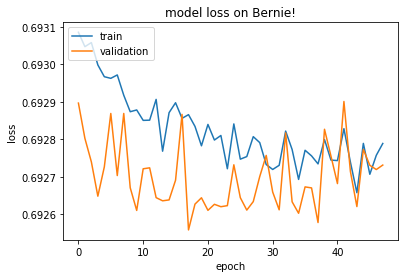

In [6]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras import regularizers

model = Sequential([
    Dense(100, input_shape=(50,)),
    Activation('relu'),
    Dropout(0.3),
    Dense(100),
    Dense(1),
    Activation('sigmoid'),
])

model.summary()

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['binary_crossentropy'])

history = model.fit(train_x, 
                    train_y, 
                    validation_data=(val_x,val_y), 
                    epochs=50, 
                    batch_size=2048, 
                    shuffle=False)

plot(history)
#0.6925 best

Using TensorFlow backend.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 100)               5100      
_________________________________________________________________
activation_1 (Activation)    (None, 100)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 101       
_________________________________________________________________
activation_2 (Activation)    (None, 1)                 0         
Total params: 15,301
Trainable params: 15,301
Non-trainable params: 0
_________________________________________________________________
Train 

KeyboardInterrupt: 

numerai_datasets.zip: 116MB [01:00, 3.01MB/s]                                                                                              

In [9]:
from more_itertools import *
from pipe import *

all_windows = windowed( range(393613), 5)

In [10]:
@Pipe
def as_npy(l):
    return np.array(list(l))

In [11]:
X = all_windows | take(1000) | select( lambda x: x | select(lambda y: train_x[y]) | as_npy ) | as_npy

In [12]:
Y = train_y[20:1000+20]

In [14]:
X.shape

(1000, 5, 50)

In [15]:
X = X.reshape(1000, 5, 50,1)

In [16]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D,Flatten,MaxPooling2D
from keras import regularizers

# cnn idea
model = Sequential([
    Conv2D(10, kernel_size=(1,3),input_shape=(5,50,1)),
    Activation('relu'),
    MaxPooling2D(pool_size=(1, 10)),
    Flatten(),
    Dropout(0.3),
    Dense(100),
    Dense(1),
    Activation('sigmoid'),
])

model.summary()

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['binary_crossentropy'])



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 5, 48, 10)         40        
_________________________________________________________________
activation_6 (Activation)    (None, 5, 48, 10)         0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 4, 10)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 200)               0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 100)               20100     
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 101       
__________

In [ ]:
history = model.fit(X, 
                    Y, 
                    epochs=10, 
                    batch_size=1, 
                    shuffle=False)

plot(history)
#0.6925 best

Epoch 1/10


In [11]:
X.size

100000000

In [6]:
# we will use logistic regression; you will want to write your own model
model = nx.logistic()

# fit model with train data and make predictions for tournament data
prediction = nx.production(model, data, tournament='bernie')

# save predictions to csv file
prediction.to_csv('logistic.csv', verbose=True)

# upload predictions to Numerai to enter the tournament
# create the public_id and secret_key on the Numerai website
#
# nx.upload('logistic.csv', tournament='bernie', public_id, secret_key)



logistic(inverse_l2=0.0001)
       logloss     auc     acc    ystd   stats            
mean  0.692808  0.5194  0.5142  0.0063   tourn      bernie
std   0.000375  0.0168  0.0137  0.0001  region  validation
min   0.691961  0.4903  0.4925  0.0062    eras          12
max   0.693460  0.5553  0.5342  0.0064  consis        0.75
Done in 0.06 minutes
Save logistic.csv
